<a href="https://colab.research.google.com/github/maruf9911/Machine-Learning-projects/blob/main/ML_breast_cancer_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast cancer detection**

Description: Breast cancer is the most common cancer among women in the world. It accounts for 25% of all cancer cases. Breast cancer begins when cells in the breast grow out of control. These cells are usually detected by analyzing tumors that can be seen on X-rays.



In [1]:

import pandas as pd
import numpy as np

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
329,895633,M,16.260,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,...,17.73,25.21,113.70,975.2,0.1426,0.2116,0.3344,0.1047,0.2736,0.07953
180,873592,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
184,873885,M,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.3630,0.1226,0.3175,0.09772
336,897604,B,12.990,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,...,13.72,16.91,87.38,576.0,0.1142,0.1975,0.1450,0.0585,0.2432,0.10090
318,894329,B,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,...,10.06,23.40,68.62,297.1,0.1221,0.3748,0.4609,0.1145,0.3135,0.10550


In [3]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**The dataset includes breast tumor information. and the diagnosis column means that the tumor is cancerous (M - malignant) or non-cancerous (B - benign).**

Let's change these values to 0 and 1. M->1, B->0

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [5]:
df.drop(columns=['id'], inplace=True)

In [6]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [7]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_predict = knn.predict(X_test)

In [11]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.8958333333333334

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[66,  0],
       [ 5, 43]])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**lets find out the most accurate 'k'**

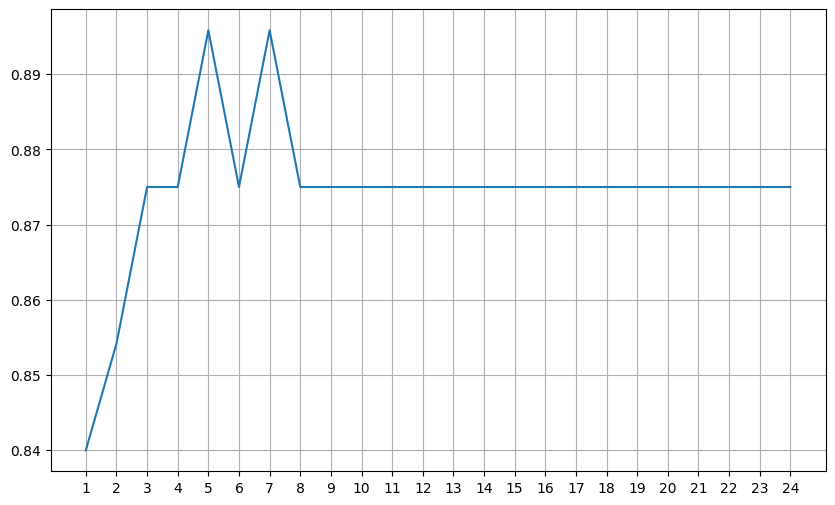

In [15]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score

f1 = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(jaccard_score(y_test, y_predict))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), f1)
plt.xticks(range(1, 25))
plt.grid()
plt.show()